# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [2]:
#On importe les données dans un dataframe
df_port = pd.read_excel("./portefeuille_actifs .xlsx")
df_hist = pd.read_excel("./historique_immobilier_paris_2017_2021_vdef2.xlsx")
df_ech = pd.read_excel("./echantillon_a_classer2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
#Nombre d'observations
#Nombre d'observations
dimensions = df_port.shape
print(f"La Dataset a {dimensions[0]} lignes et {dimensions[1]} colonnes.")
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_port.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_port.shape[1]))
df_port.info()
df_port.head()

La Dataset a 275 lignes et 12 colonnes.
Le tableau comporte 275 observation(s) ou article(s)
Le tableau comporte 12 colonne(s)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


In [4]:
#On vérifie que le type des données attribué par pandas est cohérent
df_hist.head()
#Nombre d'observations
dimensions = df_hist.shape
print(f"La Dataset a {dimensions[0]} lignes et {dimensions[1]} colonnes.")
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_hist.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_hist.shape[1]))
df_hist.info()
df_hist.head()

La Dataset a 26196 lignes et 9 colonnes.
Le tableau comporte 26196 observation(s) ou article(s)
Le tableau comporte 9 colonne(s)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


<Axes: >

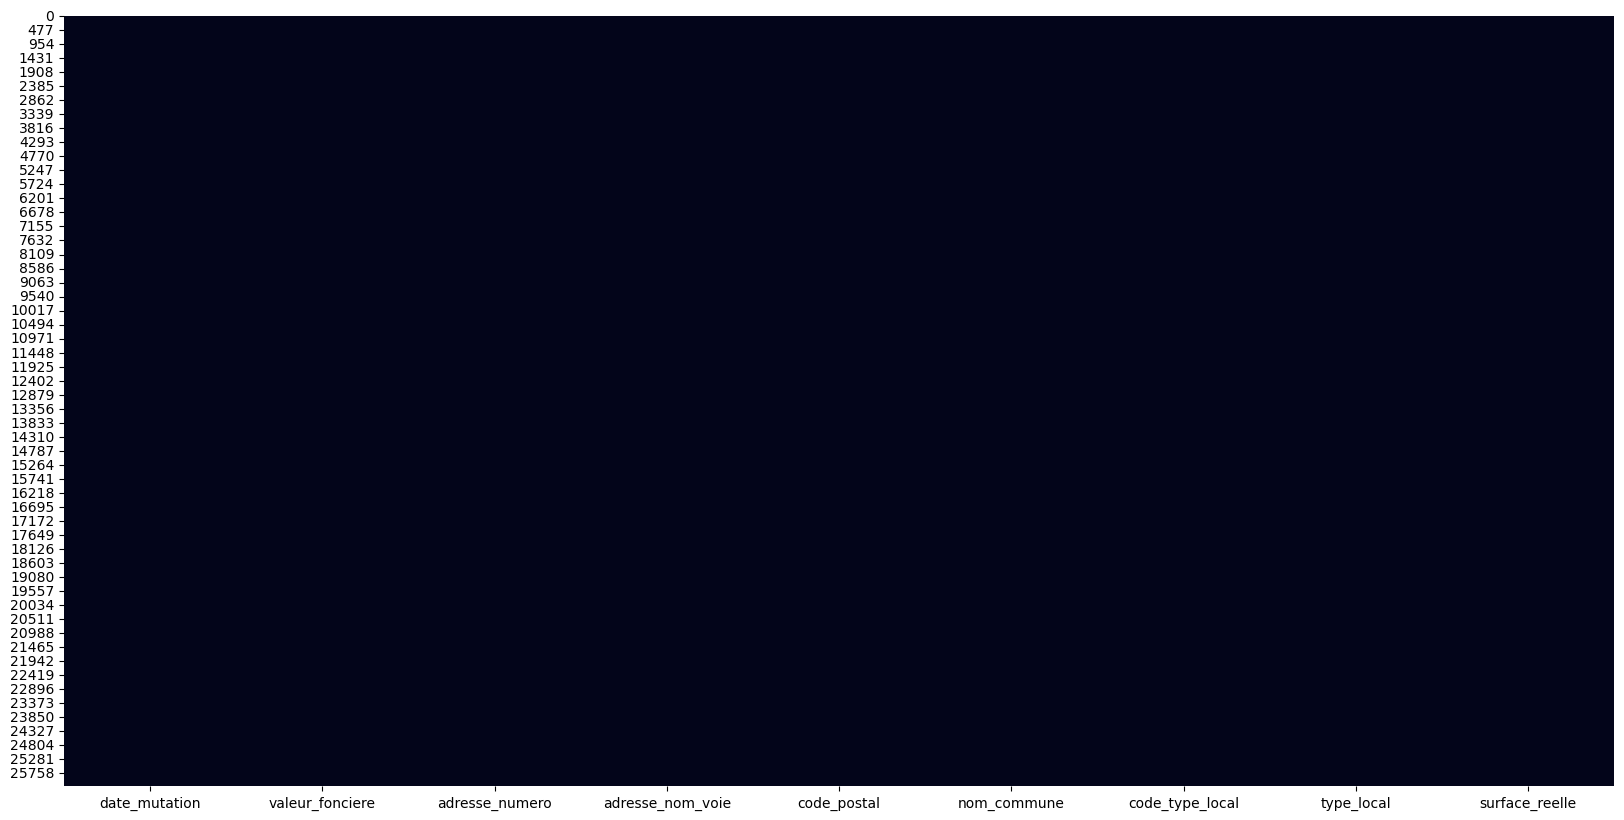

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df_hist.isna(), cbar=False)

In [6]:
#On vérifie que le type des données attribué par pandas est cohérent
df_ech.head()
#Nombre d'observations
dimensions = df_ech.shape
print(f"La Dataset a {dimensions[0]} lignes et {dimensions[1]} colonnes.")
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_ech.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_ech.shape[1]))
df_ech.info()
df_ech.head()

La Dataset a 40 lignes et 4 colonnes.
Le tableau comporte 40 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   valeur_fonciere  40 non-null     float64
 1   code_postal      40 non-null     int64  
 2   nom_commune      40 non-null     object 
 3   surface_reelle   40 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [7]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :')
print(df_hist.type_local.unique())
print(df_hist.code_type_local.unique())

la liste des différents types de biens immobiliers que nous avons dans les données est :
['Appartement' 'Local industriel. commercial ou assimilé']
[2 4]


In [8]:
type_local = df_hist['type_local'] .unique()
code_type = df_hist['code_type_local'] .unique()

format_text = "On observe qu'il y a {} et leurs code types sont {}.".format(type_local, code_type)
print(format_text)

On observe qu'il y a ['Appartement' 'Local industriel. commercial ou assimilé'] et leurs code types sont [2 4].


On observe qu'il y a ? types de biens, et que leurs codes types sont ?. 

### 3. Nombre de transactions

In [9]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est ')
print( df_hist['type_local'] .count())
print(df_hist['type_local'].value_counts())


le nombre de transactions dans les données est 
26196
type_local
Appartement                                 24353
Local industriel. commercial ou assimilé     1843
Name: count, dtype: int64


### 4. interval de l'historique des données

In [10]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le ')
print(df_hist['date_mutation'].min())
print('la dernière date de transaction dans les données est le ')
print(df_hist['date_mutation'].max())

la première date de transaction dans les données est le 
2017-01-02 00:00:00
la dernière date de transaction dans les données est le 
2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [11]:
# Calcul de la colonne
df_hist['Prix au m²'] = (df_hist['valeur_fonciere'] /df_hist['surface_reelle'])
df_hist.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,Prix au m²
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [12]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_hist.drop(['adresse_numero','adresse_nom_voie', 'nom_commune'], axis=1,  inplace=True)
df_hist.head()


,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,Prix au m²
0,2017-01-03,5.505597e+05,75003,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,75008,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,75003,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,75001,2,Appartement,15,11751.113836


In [13]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_appartement = df_hist[df_hist['type_local'] == 'Appartement'].groupby(df_hist['date_mutation'].dt.year).agg({'valeur_fonciere': 'mean', 'surface_reelle': 'mean'})
df_appartement.reset_index(inplace=True)
# Rajouter le prix au M2
df_appartement['prix_m²'] = df_appartement['valeur_fonciere'] / df_appartement['surface_reelle']
df_appartement.head()


,date_mutation,valeur_fonciere,surface_reelle,prix_m²
0,2017,427963.238883,44.627737,9589.624424
1,2018,448055.762541,44.271671,10120.597583
2,2019,461950.057064,43.361645,10653.425459
3,2020,462383.253604,42.900654,10778.000054
4,2021,458771.507203,43.479864,10551.355707


In [14]:
# Renommer les colonnes
df_appartement.rename(columns={'date_mutation': 'année_mutation', 'valeur_fonciere': 'prix_moyen', 'surface_reelle': 'surface_moyenne'}, inplace=True)
df_appartement.head()

,année_mutation,prix_moyen,surface_moyenne,prix_m²
0,2017,427963.238883,44.627737,9589.624424
1,2018,448055.762541,44.271671,10120.597583
2,2019,461950.057064,43.361645,10653.425459
3,2020,462383.253604,42.900654,10778.000054
4,2021,458771.507203,43.479864,10551.355707


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

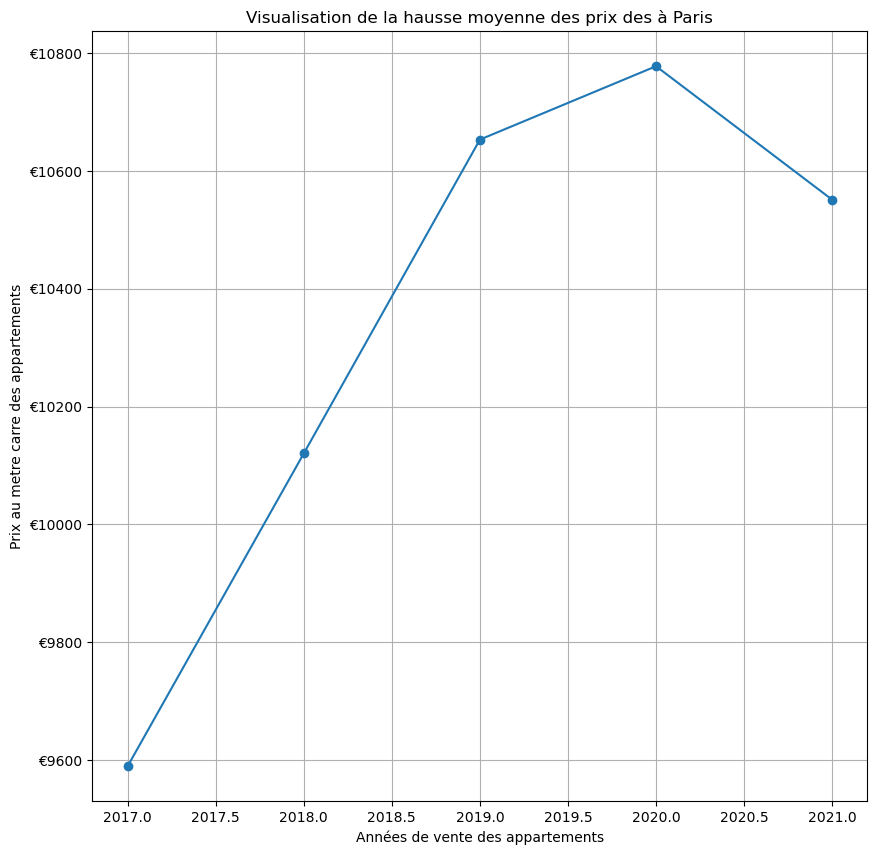

In [15]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
plt.plot(df_appartement['année_mutation'], df_appartement['prix_m²'], marker='o')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [16]:
#Liste des codes postaux dans nos données.
df_hist['code_postal'].unique()


array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002], dtype=int64)

In [17]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_appartement1=df_hist[df_hist['type_local'] == 'Appartement'].drop_duplicates()
df_appartement1['année_mutation']=df_appartement1['date_mutation'].dt.year
df_appartement1.head()
df_appartement2 = df_appartement1.groupby(['code_postal','année_mutation']).agg({'Prix au m²': 'mean'})
df_appartement2.head(20)


Prix au m²
code_postal année_mutation              
75001       2017            11762.706289
            2018            12621.226146
            2019            13269.256149
            2020            13405.991820
            2021            13379.498578
75002       2017            10920.126562
            2018            11309.461297
            2019            12150.543211
            2020            12181.589810
            2021            11773.445419
75003       2017            11679.818729
            2018            12469.997687
            2019            12814.986252
            2020            12834.313205
            2021            12660.546567
75004       2017            12407.227522
            2018            13429.985712
            2019            13641.494658
            2020            13104.738603
            2021            12936.958334

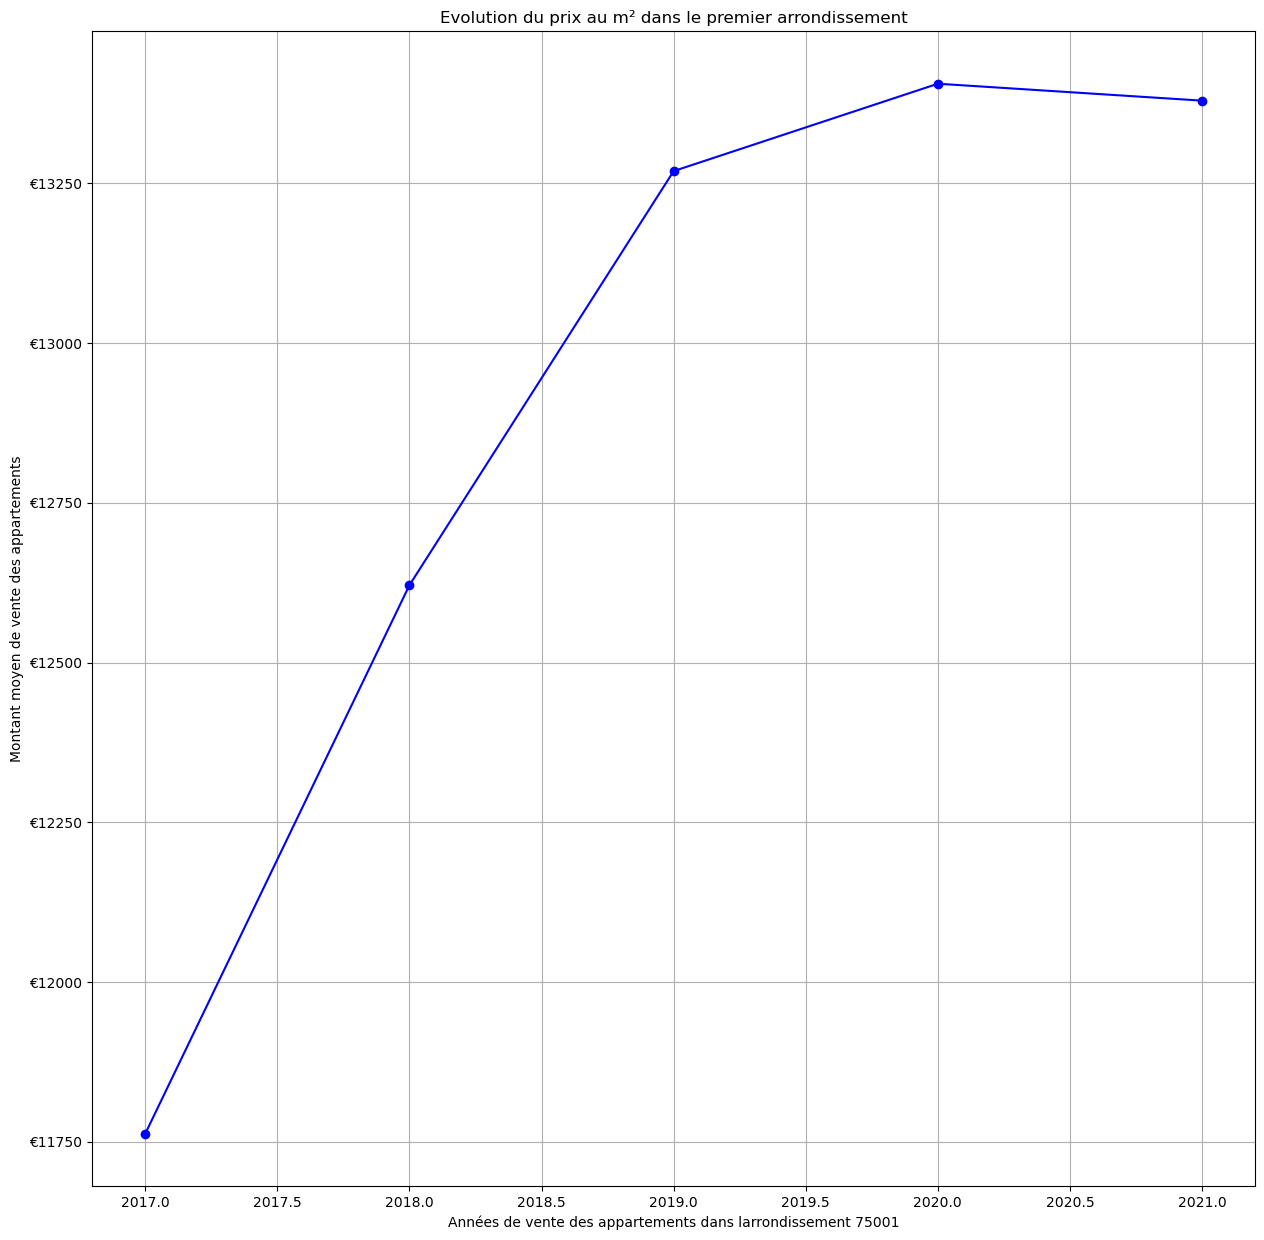

In [18]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
df_appartement1_filtered = df_appartement1[df_appartement1['code_postal'] == 75001]
prix_moyen_annuel = df_appartement1_filtered.groupby('année_mutation')['Prix au m²'].mean()
plt.plot(prix_moyen_annuel.index, prix_moyen_annuel.values, marker='o', color='blue')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

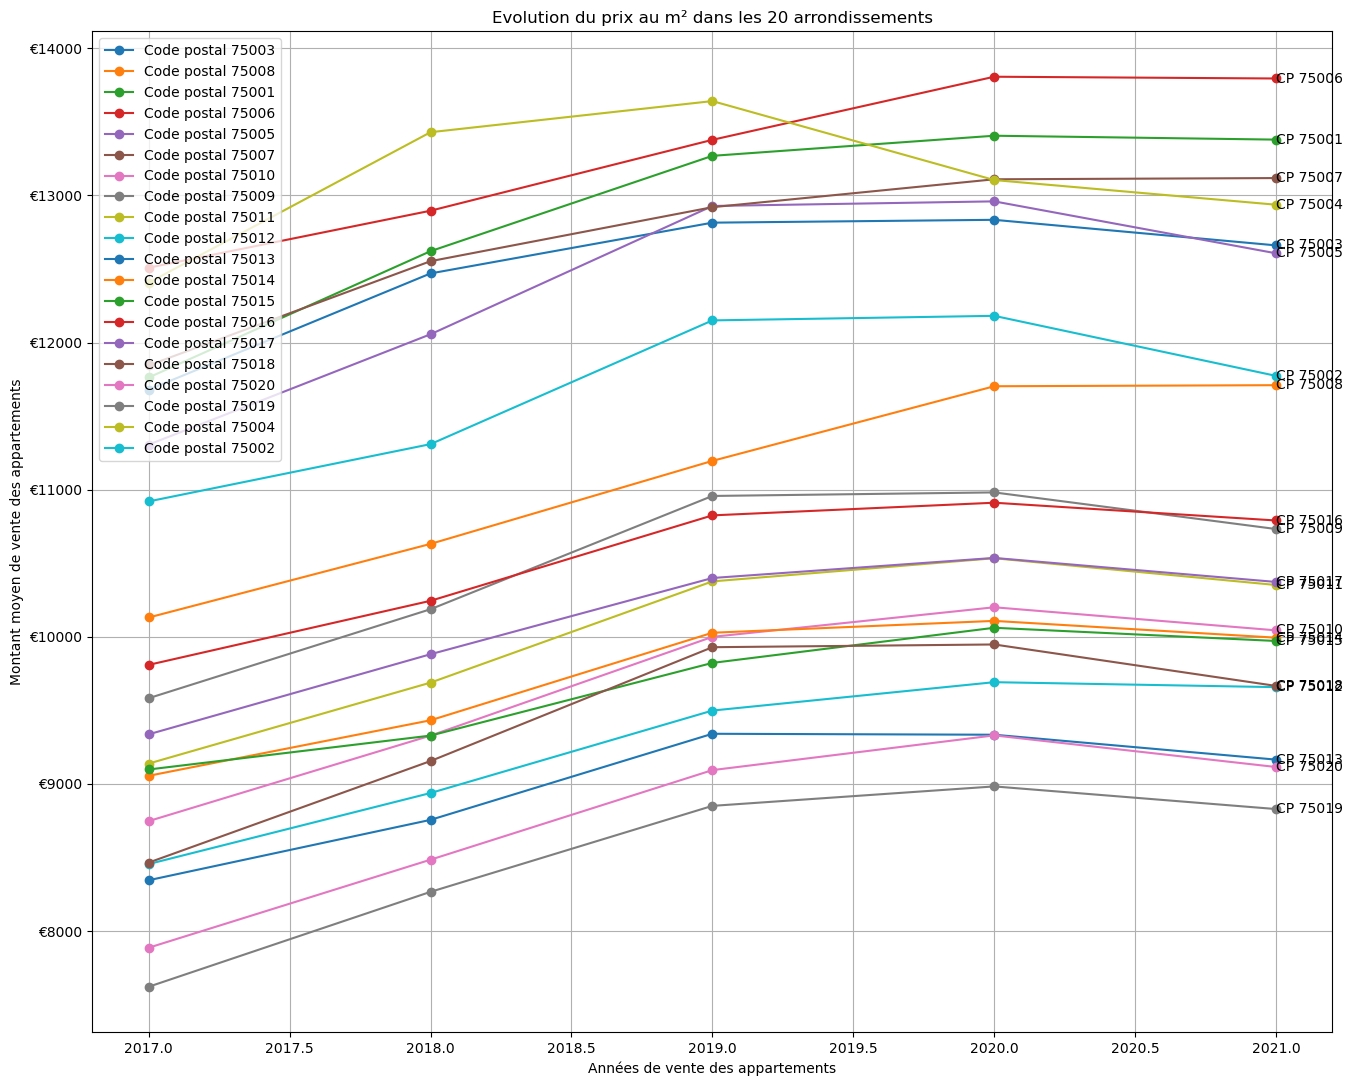

In [19]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
codes_postaux = df_appartement1['code_postal'].unique()
plt.figure(figsize=(16, 13))
#Insérer les lignes à tracer ci-dessous
for code_postal in codes_postaux:
    # Sélection des données pour le code postal actuel
    df_appartement2_filtere = df_appartement1[df_appartement1['code_postal'] == code_postal]
    
    # Regroupement par année de mutation et calcul de la moyenne du prix au mètre carré
    prix_moyen_annuel = df_appartement2_filtere.groupby('année_mutation')['Prix au m²'].mean()
    
    # Tracé de la courbe pour le code postal actuel
    plt.plot(prix_moyen_annuel.index, prix_moyen_annuel.values, marker='o', label=f'Code postal {code_postal}')
    # Ajout d'une annotation près du dernier point de la courbe
    last_year = prix_moyen_annuel.index[-1]
    last_value = prix_moyen_annuel.values[-1]
    plt.text(last_year, last_value, f'CP {code_postal}', ha='left', va='center')


plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement que ?

### 7. Prix au metre carré par transaction dans un arrondissement

In [20]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
print('Le nombre de transactions pour les appartements dans 75006 est :\n', df_appartement1[(df_appartement1['type_local'] == 'Appartement') & (df_appartement1['code_postal'] == 75006)].shape[0])


Le nombre de transactions pour les appartements dans 75006 est :
 709


On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

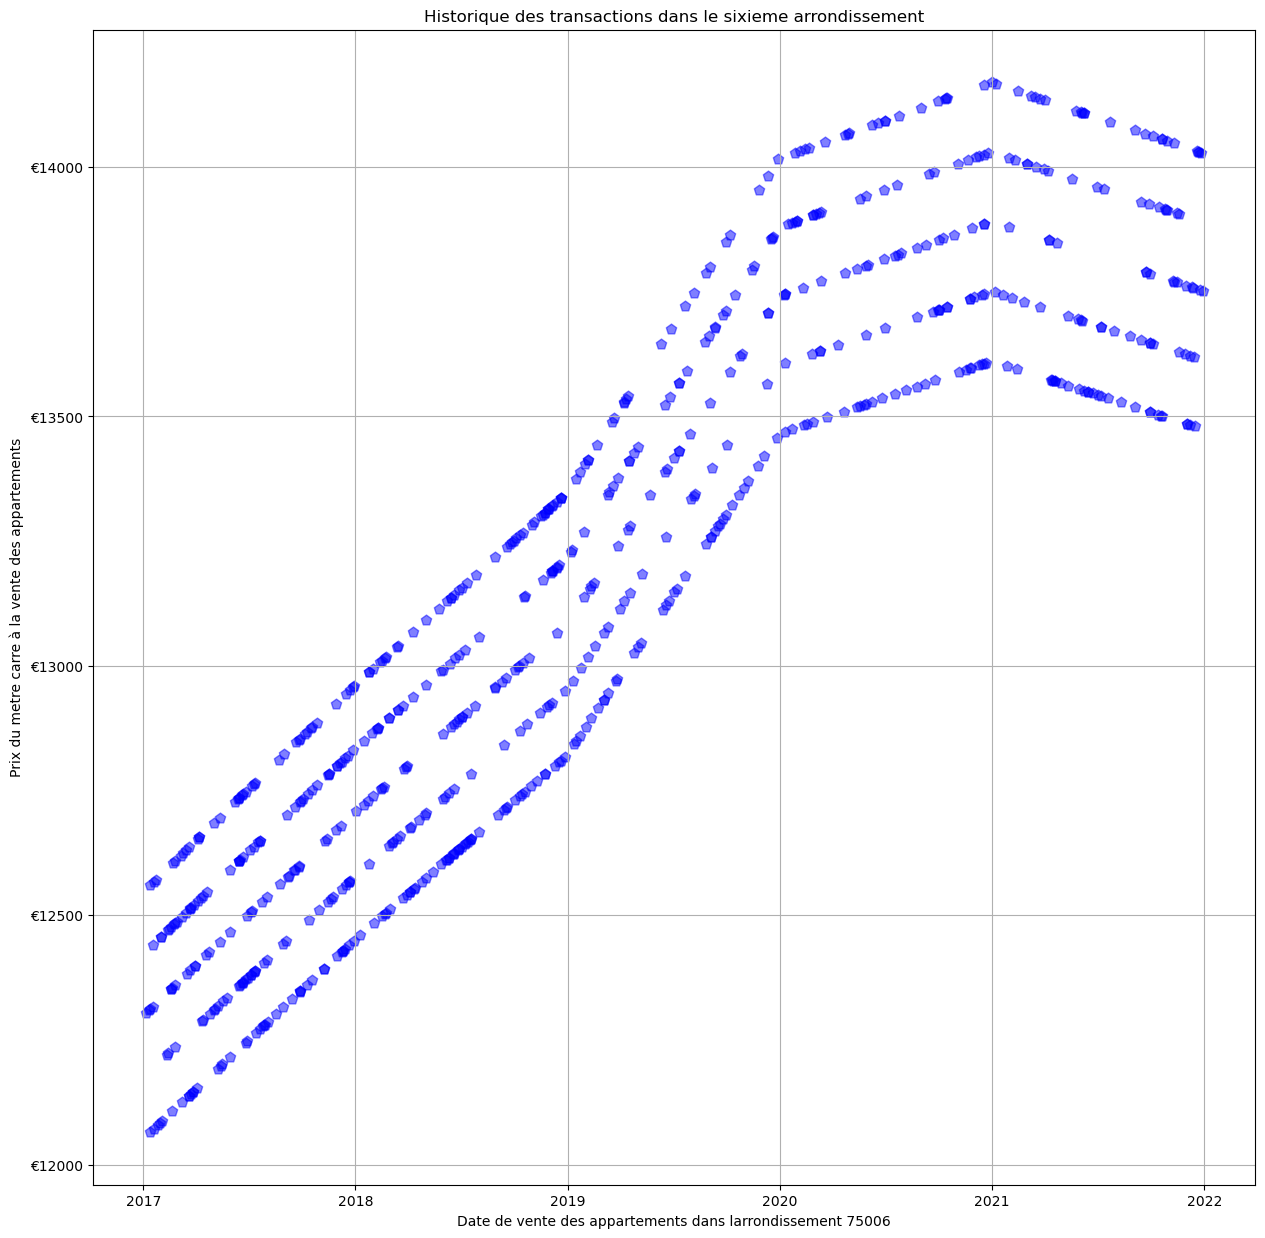

In [21]:
cp=75006
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot
df = df_appartement1.loc[df_appartement1['code_postal'] == 75006, :]
plt.scatter( df['date_mutation'],df['Prix au m²'], s=60, c='blue', alpha=0.5, marker='p')

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que ?

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [22]:
#On calcule la corrélation de Spearman
from scipy import stats
num_column = df_appartement1.select_dtypes(include=['number']).columns
# Calculer le coefficient de corrélation de Pearson pour les colonnes numériques
pearson_co = df_appartement1[num_column].corr(method='pearson')
pearson_co.head()


,valeur_fonciere,code_postal,code_type_local,surface_reelle,Prix au m²,année_mutation
valeur_fonciere,1.000000,-0.135914,NaN,0.980113,0.240985,0.029764
code_postal,-0.135914,1.000000,NaN,-0.018126,-0.756067,0.029579
code_type_local,NaN,NaN,NaN,NaN,NaN,NaN
surface_reelle,0.980113,-0.018126,NaN,1.000000,0.084815,-0.015388
Prix au m²,0.240985,-0.756067,NaN,0.084815,1.000000,0.267664


Le coefficient de corrélation est de ? avec une pvalue de ? donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [23]:
from scipy.stats import pearsonr
X = df_appartement1['année_mutation']
Y = df_appartement1['Prix au m²']
#Calcul du coefficient de corrélation de Pearson et de sa p-value
correlation_coefficient, p_value = pearsonr(X, Y)
# Affichage du résultat
print("Le coefficient de corrélation de Pearson est :", correlation_coefficient)
print("La p-value associée est :", p_value)

Le coefficient de corrélation de Pearson est : 0.26766430095199717
La p-value associée est : 0.0


Le coefficient de corrélation est de ? avec une pvalue de ?. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [24]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux=df_hist[df_hist['type_local'] == 'Local industriel. commercial ou assimilé'].drop_duplicates()
#rajout d'une colonne annnée
df_locaux['année_mutation']=df_locaux['date_mutation'].dt.year

In [25]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_hist['année_mutation']=df_hist['date_mutation'].dt.year
dataHistoglobale = df_hist.groupby(['type_local','année_mutation']).agg({'Prix au m²': 'mean'})
dataHistoglobale.head(10)


Prix au m²
type_local                               année_mutation              
Appartement                              2017             9492.859195
                                         2018            10031.403432
                                         2019            10562.712581
                                         2020            10674.872650
                                         2021            10455.600126
Local industriel. commercial ou assimilé 2017            10949.909217
                                         2018            11569.499180
                                         2019            11960.132050
                                         2020            11966.470204
                                         2021            12006.488691

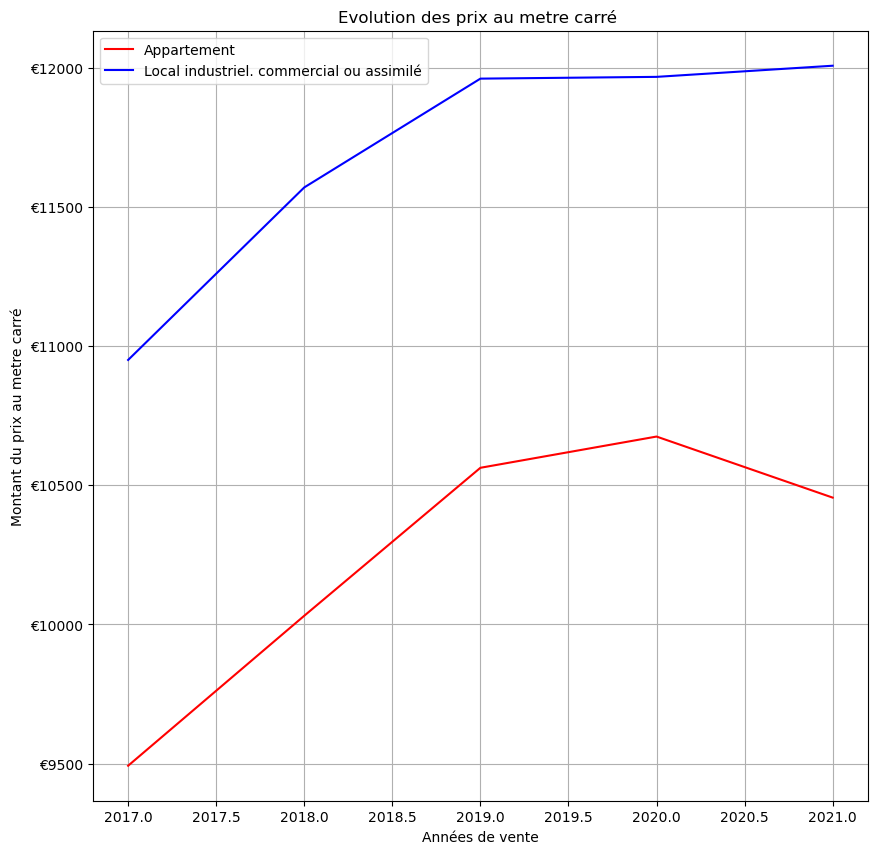

In [26]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
appartement_data = dataHistoglobale.loc['Appartement']
locaux_data = dataHistoglobale.loc['Local industriel. commercial ou assimilé']

plt.figure(figsize=(10,10))
plt.plot(appartement_data.index, appartement_data['Prix au m²'], label='Appartement',color='red')
plt.plot(locaux_data.index, locaux_data['Prix au m²'], label='Local industriel. commercial ou assimilé',color='blue')

plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est ?

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Charger les données
data = df_hist

# Sélectionner les variables predictives et la cible
X = data[['date_mutation', 'surface_reelle', 'code_postal', 'type_local']]
y = data['valeur_fonciere']

# Transformer les variables catégoriques en variables indicatrices
X_encoded = pd.get_dummies(X, columns=['code_postal', 'type_local'], drop_first=True)
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)
#conversion des données en str
# Transformer la date de mutation en caractéristiques numériques
X_train['annee_mutation'] = X_train['date_mutation'].dt.year
X_train['mois_mutation'] = X_train['date_mutation'].dt.month
X_train['jour_mutation'] = X_train['date_mutation'].dt.day
X_train.drop(columns=['date_mutation'], inplace=True)

X_test['annee_mutation'] = X_test['date_mutation'].dt.year
X_test['mois_mutation'] = X_test['date_mutation'].dt.month
X_test['jour_mutation'] = X_test['date_mutation'].dt.day
X_test.drop(columns=['date_mutation'], inplace=True)

# Sélectionner uniquement les colonnes numériques pour la mise à l'échelle
numeric_cols = ['surface_reelle']
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]
# Mise à l'échelle des variables numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Remplacer les colonnes numériques mises à l'échelle dans X_train et X_test
X_train[numeric_cols] = X_train_scaled
X_test[numeric_cols] = X_test_scaled

#On entraîne l'algorithme ci-dessous et on effectue la prédiction

# Entraîner le modèle de régression linéaire
reg = LinearRegression()
reg.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de test
score = reg.score(X_test, y_test)
print("Score R^2 sur l'ensemble de test:", score)
# Faire des prédictions sur l'ensemble de test
y_pred = reg.predict(X_test)

# Évaluer le modèle
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print(f"\tmean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}")


Score R^2 sur l'ensemble de test: 0.9860665511210631
	mean_absolute_percentage_error: 0.09525479341422881


Notre algorithme fait donc ? % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- ?
- ?
- ?
- ?

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [28]:
#On importe les données dans un dataframe
dataset=pd.read_excel("./portefeuille_actifs .xlsx")
dataset.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


In [29]:
dataset = dataset.rename(columns={'surface_reelle_bati': 'surface_reelle'})
dataset.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [30]:
# Sélectionner les variables predictives
X = dataset[['code_postal', 'type_local', 'surface_reelle']]

# Transformer les variables catégoriques en variables indicatrices
nouveau_X_encoded = pd.get_dummies(X, columns=['code_postal', 'type_local'], drop_first=True)

# Mise à l'échelle des variables numériques
nouveau_X_numeric = nouveau_X_encoded[['surface_reelle']]
nouveau_X_numeric_scaled = scaler.transform(nouveau_X_numeric)
nouveau_X_encoded[['surface_reelle']] = nouveau_X_numeric_scaled

# On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

# Créer la date du 31 décembre 2022
date_mutation = dt.datetime(2022, 12, 31)

# Ajouter cette date comme colonne timestamp à votre nouveau jeu de données
nouveau_X_encoded['date_mutation'] = date_mutation
# Créer les variables de date de prédiction
nouveau_X_encoded['annee_mutation'] = nouveau_X_encoded['date_mutation'].dt.year
nouveau_X_encoded['mois_mutation'] = nouveau_X_encoded['date_mutation'].dt.month
nouveau_X_encoded['jour_mutation'] = nouveau_X_encoded['date_mutation'].dt.day
# Supprimer la colonne 'date_mutation' si elle n'est plus nécessaire
nouveau_X_encoded.drop(columns=['date_mutation'], inplace=True)

In [31]:
#Conversion du dataframe en str
nouveau_X_encoded_str = nouveau_X_encoded.to_string()
print(nouveau_X_encoded_str)

     surface_reelle  code_postal_75002  code_postal_75003  code_postal_75004  code_postal_75005  code_postal_75006  code_postal_75007  code_postal_75008  code_postal_75009  code_postal_75010  code_postal_75011  code_postal_75012  code_postal_75013  code_postal_75014  code_postal_75015  code_postal_75016  code_postal_75017  code_postal_75018  code_postal_75019  code_postal_75020  type_local_Local industriel. commercial ou assimilé  annee_mutation  mois_mutation  jour_mutation
0         -0.467158              False              False              False              False              False              False              False              False              False              False              False              False              False              False              False              False              False              False              False                                                False            2022             12             31
1         -0.531057              False  

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [32]:
# Faire la prédiction avec le modèle entraîné
nouvelles_predictions = reg.predict(nouveau_X_encoded)
# Afficher les prédictions
print(nouvelles_predictions)

[ 428702.97574788  366277.46956568  824482.59626647  876417.26458708
  322308.7392745   460835.87060264  387589.33592386  639872.28191997
  137045.73727512  139304.44271826  318196.60131961  203240.04179279
  480033.28423365  373734.97265819  332964.67245359 1061773.1653042
 1122848.72528094  426753.61833821  980775.39079552  373387.1995875
  469638.37126999  558473.38211624  137045.73727512  512262.10398634
  145362.91190263  490950.23762817  808369.52755767  787057.66119949
  676950.21550646  171011.22204009  171272.24225552  426753.61833821
  605906.79715499  266914.62065189 1185439.32678064  234946.82111462
  510003.3985432   213895.97497188  234946.82111462  228139.4535645
  398245.26910295  341767.17312093  379793.44184256  147701.67045421
  373734.97265819  341506.15290551  224290.88793553  531315.26490138
  251922.2436935   160616.30907644  535427.40285626 1156467.20856543
  266914.62065189  139304.44271826  435411.86628959  739624.24616073
  448065.48469638  608165.50259813  5

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [33]:
#On vérifie les 10 premières valeurs
#print(nouveau_X_encoded.head(10))
nouveau_X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   surface_reelle                                       275 non-null    float64
 1   code_postal_75002                                    275 non-null    bool   
 2   code_postal_75003                                    275 non-null    bool   
 3   code_postal_75004                                    275 non-null    bool   
 4   code_postal_75005                                    275 non-null    bool   
 5   code_postal_75006                                    275 non-null    bool   
 6   code_postal_75007                                    275 non-null    bool   
 7   code_postal_75008                                    275 non-null    bool   
 8   code_postal_75009                                    275 non-null    b

In [34]:
# Faire la prédiction avec le modèle entraîné
nouvelles_predictions = reg.predict(nouveau_X_encoded)
# Filtrer les prédictions correspondant au segment "appartement"
predictions_Particulier = nouvelles_predictions[nouveau_X_encoded['type_local_Local industriel. commercial ou assimilé']==0]
# Afficher les prédictions pour chaque segment
print("Prédictions pour le segment 'Particulier':")
print(predictions_Particulier)

Prédictions pour le segment 'Particulier':
[ 428702.97574788  366277.46956568  824482.59626647  876417.26458708
  322308.7392745   460835.87060264  387589.33592386  639872.28191997
  137045.73727512  139304.44271826  318196.60131961  203240.04179279
  480033.28423365  373734.97265819  332964.67245359 1061773.1653042
 1122848.72528094  426753.61833821  980775.39079552  373387.1995875
  469638.37126999  558473.38211624  137045.73727512  512262.10398634
  145362.91190263  490950.23762817  808369.52755767  787057.66119949
  676950.21550646  171011.22204009  171272.24225552  426753.61833821
  605906.79715499  266914.62065189 1185439.32678064  234946.82111462
  510003.3985432   213895.97497188  234946.82111462  228139.4535645
  398245.26910295  341767.17312093  379793.44184256  147701.67045421
  373734.97265819  341506.15290551  224290.88793553  531315.26490138
  251922.2436935   160616.30907644  535427.40285626 1156467.20856543
  266914.62065189  139304.44271826  435411.86628959  739624.246

In [35]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):', predictions_Particulier.sum())
print('le nombre d Appartements):', predictions_Particulier.shape[0], 'soit 56% des actifs')

la valorisation du segment corporate est (en millions deuros): 70650549.86418009
le nombre d Appartements): 154 soit 56% des actifs


In [36]:
# Faire la prédiction avec le modèle entraîné
nouvelles_predictions = reg.predict(nouveau_X_encoded)
# Filtrer les prédictions correspondant au segment "appartement"
predictions_Corporate = nouvelles_predictions[nouveau_X_encoded['type_local_Local industriel. commercial ou assimilé']]
# Afficher les prédictions pour chaque segment
print("Prédictions pour le segment 'Corporate':")
print(predictions_Corporate)

Prédictions pour le segment 'Corporate':
[ 471712.78016411  503845.67501888  435797.93798947  524992.44605955
  984707.66565268 2641576.1060607  1565326.85497281  651175.30701437
  494923.85474159  652863.64420861 1494847.46067407  586978.68772442
  374121.04435808  638260.66839214  393174.20527312  425142.00481038
  366663.54126557 1043186.12919749 2038300.05280757  333350.74415347
  410937.95772915 1176514.46287626  704193.95269438  537547.58745794
  590438.13802642 2304698.38228477 2347322.11500112 1791099.13696137
 2348667.11257595 2769447.30420976  375974.47686983  374121.04435808
  336346.42547553  727455.17646223  368314.2250128   622405.93756368
  593298.17712421  972706.73489876  470024.44296987  579782.20484733
  380179.51354245  706308.40542156  489077.60388491  786386.48525505
 1396845.4703203  1141103.07402218 1144059.33076844  430111.80776954
  413428.82398696  242933.89312156  946483.56739632  605493.70566551
 1875864.78984073  952218.9994412   920251.19990393  679827.15

In [37]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):', predictions_Corporate.sum())
print('le nombre de biens immobiliers valorisés):', predictions_Corporate.shape[0], 'soit 44% des actifs')


la valorisation du segment corporate est (en millions deuros): 97670950.35446888
le nombre de biens immobiliers valorisés): 121 soit 44% des actifs


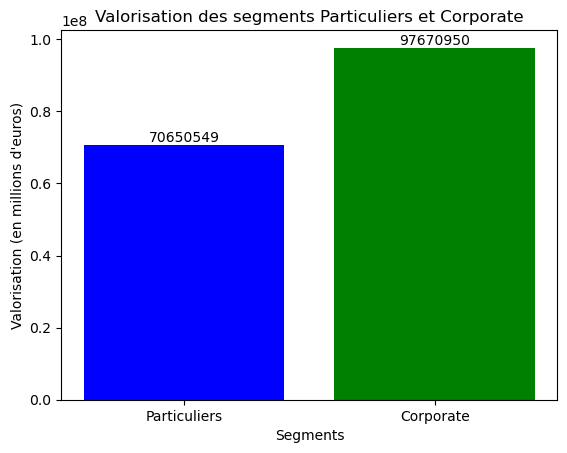

In [38]:
# Calcul des valorisations pour les segments "Particuliers" et "Corporate"
valorisation_particulier = int(predictions_Particulier.sum())
valorisation_corporate = int(predictions_Corporate.sum())

# Création du graphique en barres
segments = ['Particuliers', 'Corporate']
valorisations = [valorisation_particulier, valorisation_corporate]

plt.bar(segments, valorisations, color=['blue', 'green'])
plt.xlabel('Segments')
plt.ylabel('Valorisation (en millions d\'euros)')
plt.title('Valorisation des segments Particuliers et Corporate')

# Ajout des étiquettes de valeurs sur les barres
for i, val in enumerate(valorisations):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.show()

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- ?
- ?

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [39]:
#On importe les données dans un dataframe
df=pd.read_excel("./historique_immobilier_paris_2017_2021_vdef2.xlsx")
df.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [40]:
# Rajouter le prix au m²
df['prix_M2'] = df['valeur_fonciere'] / df['surface_reelle']
df.head()


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_M2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836


In [41]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df.drop(['date_mutation','valeur_fonciere','adresse_numero','adresse_nom_voie', 'nom_commune','code_type_local','surface_reelle'], axis=1,  inplace=True)

In [42]:
#df_particulier=df[df['type_local'] == 'Appartement'].drop_duplicates()
df.groupby('code_postal')['prix_M2'].mean().sort_values(ascending=True)

code_postal
75019     8566.594188
75020     8800.116029
75013     9043.411467
75012     9275.674825
75018     9484.292583
75015     9693.028278
75010     9728.377102
75014     9759.247363
75011    10048.693358
75017    10150.143451
75016    10573.502690
75009    10590.180551
75008    11168.271294
75002    11778.463196
75005    12405.648427
75003    12592.586285
75007    12773.668327
75001    12997.849088
75004    13224.636391
75006    13280.010482
Name: prix_M2, dtype: float64

In [43]:
from sklearn.cluster import KMeans

C:\Users\BOB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


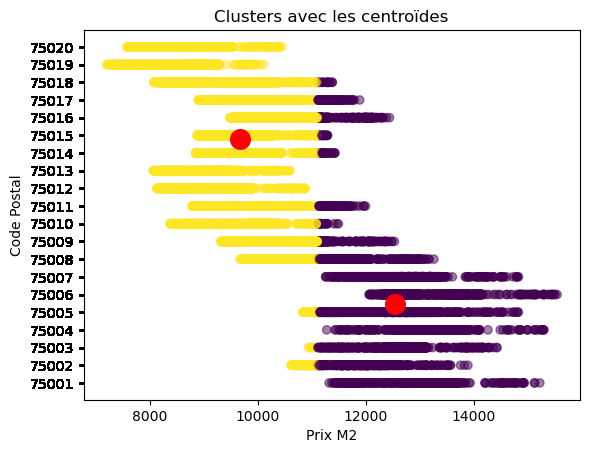

In [44]:
 #Kmeans 
# Convertir les variables catégorielles en variables indicatrices
X_encoded = pd.get_dummies(df[['code_postal', 'type_local']])

# Concaténer les variables indicatrices avec les autres variables
X = pd.concat([df[['prix_M2']], X_encoded], axis=1)

# Initialiser et entraîner le modèle K-means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Obtenir les étiquettes des clusters pour chaque point de données
labels = kmeans.labels_

# Obtenir les positions des centroïdes
centroids = kmeans.cluster_centers_

# Extraire les coordonnées x et y des centroïdes
centroid_x = centroids[:, 0]
centroid_y = centroids[:, 1]

# Afficher les points de données avec les couleurs correspondant aux clusters
plt.scatter(X['prix_M2'], X['code_postal'], c=labels, cmap='viridis', alpha=0.5)

# Afficher les centroïdes
plt.scatter(centroid_x, centroid_y, marker='o', s=200, color='red')

# Ajouter des étiquettes aux axes et un titre
plt.xlabel('Prix M2')
plt.ylabel('Code Postal')
plt.title('Clusters avec les centroïdes')
# Spécifier les étiquettes des codes postaux sur l'axe des ordonnées
plt.yticks(X['code_postal'])
# Afficher le graphique
plt.show()

In [45]:
# Calculer le score du modèle K-means
score = kmeans.score(X)
from sklearn.metrics import silhouette_score

print("silhouette_score: ", silhouette_score(X,labels ))

# Afficher le score
print("Score du modèle K-means :", score)

# Obtenir l'inertie du modèle
inertia = kmeans.inertia_

print("Inertie du modèle K-means :", inertia)

silhouette_score:  0.6615270298663041
Score du modèle K-means : -16253150054.103024
Inertie du modèle K-means : 16253150054.10302


In [46]:
# Remplacer les valeurs des labels
df['type_local'] = df['type_local'].replace({0: 'Local industriel. commercial ou assimilé', 1: 'Appartement'})

In [47]:
print("Labels des clusters :", labels)

Labels des clusters : [1 1 1 ... 0 0 0]


In [48]:
#rajout du dataset
DfKmeans=pd.read_excel('echantillon_a_classer2.xlsx')
DfKmeans.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


In [49]:
# Rajouter le prix au M2
DfKmeans['prix_M2'] = DfKmeans['valeur_fonciere'] / DfKmeans['surface_reelle']
DfKmeans.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_M2
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.444128
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.572493
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.697790
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.142168
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.610005


In [50]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
DfKmeans.drop(['valeur_fonciere', 'nom_commune','surface_reelle'], axis=1,  inplace=True)
DfKmeans.head()

,code_postal,prix_M2
0,75019,9871.444128
1,75019,10045.572493
2,75019,9194.697790
3,75019,9469.142168
4,75019,7463.610005


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Diviser les données en fonctionnalités (X) et cible (y)
X = df[['code_postal', 'prix_M2']]
y = df['type_local']

# Convertir la variable catégorielle 'code_postal' en variable indicatrice
X_encoded = pd.get_dummies(X, columns=['code_postal'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de classification logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Afficher les performances
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9274809160305344
Classification Report:
                                          precision    recall  f1-score   support

                             Appartement       0.93      1.00      0.96      4860
Local industriel. commercial ou assimilé       0.00      0.00      0.00       380

                                accuracy                           0.93      5240
                               macro avg       0.46      0.50      0.48      5240
                            weighted avg       0.86      0.93      0.89      5240



C:\Users\BOB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BOB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BOB\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#Repartition des biens par type local dans le 19eme
count_75019_by_type = df_hist[df_hist['code_postal'] == 75019].drop_duplicates().groupby('type_local').size()
print(count_75019_by_type)

type_local
Appartement                                 1088
Local industriel. commercial ou assimilé      38
dtype: int64


In [53]:
# Convertir la colonne 'code_postal' en variables indicatrices
DfKmeans_encoded = pd.get_dummies(DfKmeans, columns=['code_postal'])

# Verifier la correspondance des variables
missing_columns = set(X_train.columns) - set(DfKmeans_encoded.columns)
for column in missing_columns:
    DfKmeans_encoded[column] = 0

# Réorganiser les colonnes pour correspondre à l'ordre des colonnes dans les données d'entraînement
DfKmeans_encoded = DfKmeans_encoded[X_train.columns]

# Utiliser le modèle de régression logistique pour prédire le type local pour DfKmeans_encoded
predicted_type_local = model.predict(DfKmeans_encoded)

# Afficher les prédictions
print("Predicted Type Local for DfKmeans:")
print(predicted_type_local)


Predicted Type Local for DfKmeans:
['Appartement' 'Appartement' 'Appartement' 'Appartement' 'Appartement'
 'Appartement' 'Appartement' 'Appartement' 'Appartement' 'Appartement'
 'Appartement' 'Appartement' 'Appartement' 'Appartement' 'Appartement'
 'Appartement' 'Appartement' 'Appartement' 'Appartement' 'Appartement'
 'Appartement' 'Appartement' 'Appartement' 'Appartement' 'Appartement'
 'Appartement' 'Appartement' 'Appartement' 'Appartement' 'Appartement'
 'Appartement' 'Appartement' 'Appartement' 'Appartement' 'Appartement'
 'Appartement' 'Appartement' 'Appartement' 'Appartement' 'Appartement']


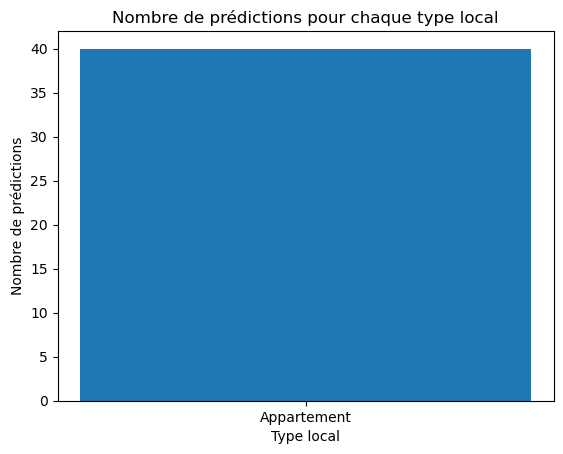

In [54]:
# Compter le nombre de prédictions pour chaque type local prédit
unique, counts = np.unique(predicted_type_local, return_counts=True)

# Créer le graphique en barres
plt.bar(unique, counts)

# Ajouter des étiquettes aux axes et un titre
plt.xlabel('Type local')
plt.ylabel('Nombre de prédictions')
plt.title('Nombre de prédictions pour chaque type local')

# Afficher le graphique
plt.show()

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- ?
- ?